<a href="https://colab.research.google.com/github/VlatekSoft/AI_base/blob/main/%D0%92%D0%B5%D0%B1%D0%B8%D0%BD%D0%B0%D1%80_26_%D0%B4%D0%B5%D0%BA%D0%B0%D0%B1%D1%80%D1%8F_2024_%D0%9C%D0%B0%D1%80%D0%B0%D1%84%D0%BE%D0%BD_web_%D0%BF%D1%80%D0%B8%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9_%D0%94%D0%B5%D0%BD%D1%8C_4_DALL_E_%D0%B8_GPT_4_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Установка библиотеки OpenAI и ключа из секретов Colab
!pip install openai==0.28.1
# Токен из секретов Colab
from google.colab import userdata
d_key = userdata.get("OPENAI_API_KEY")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.57.4
    Uninstalling openai-1.57.4:
      Successfully uninstalled openai-1.57.4


In [ ]:
# @title Установка библиотеки Django
!pip install django
!pip install django django-cors-headers

### Создайте проект Django:
!django-admin startproject myproject

### Перейдите в каталог проекта:
%cd /content/myproject

### Создайте приложение Django:
!python manage.py startapp myapp


import os

# Путь к файлу, который нужно обработать
file_path = "/content/myproject/myproject/settings.py"

# Читаем содержимое файла и извлекаем SECRET_KEY
with open(file_path, "r") as file:
    content = file.read()

# Извлекаем значение SECRET_KEY
import re
secret_key_match = re.search(r'SECRET_KEY\s*=\s*[\'"](.+?)[\'"]', content)
if secret_key_match:
    secret_key = secret_key_match.group(1)
else:
    raise ValueError("SECRET_KEY не найден в файле.")

# Новое содержимое файла

text_s = f"""

SECRET_KEY = '{secret_key}'

from pathlib import Path
import os
# Build paths inside the project like this: BASE_DIR / 'subdir'.
BASE_DIR = Path(__file__).resolve().parent.parent

# Quick-start development settings - unsuitable for production
# See https://docs.djangoproject.com/en/5.1/howto/deployment/checklist/


# SECURITY WARNING: don't run with debug turned on in production!
DEBUG = True

ALLOWED_HOSTS = ['*']  # Разрешить запросы с любых хостов

# CORS settings
INSTALLED_APPS = [
    'corsheaders',  # Добавить приложение для обработки CORS
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',
    'myapp',  # Ваше приложение для обработки текстов
]

MIDDLEWARE = [
    'corsheaders.middleware.CorsMiddleware',  # CORS обработчик (должен быть первым)
    'django.middleware.common.CommonMiddleware',
    'django.middleware.security.SecurityMiddleware',
    'django.contrib.sessions.middleware.SessionMiddleware',
    'django.middleware.csrf.CsrfViewMiddleware',
    'django.contrib.auth.middleware.AuthenticationMiddleware',
    'django.contrib.messages.middleware.MessageMiddleware',
    'django.middleware.clickjacking.XFrameOptionsMiddleware',
]

CORS_ALLOW_ALL_ORIGINS = True  # Разрешить запросы с любых доменов
CORS_ALLOW_METHODS = [  # Разрешить только определенные методы
    'GET',
    'POST',
    'OPTIONS',
]
CORS_ALLOW_HEADERS = [  # Разрешенные заголовки
    'content-type',
    'authorization',
]

ROOT_URLCONF = 'myproject.urls'

TEMPLATES = [
    {{
        'BACKEND': 'django.template.backends.django.DjangoTemplates',
        'DIRS': [],
        'APP_DIRS': True,
        'OPTIONS': {{
            'context_processors': [
                'django.template.context_processors.debug',
                'django.template.context_processors.request',
                'django.contrib.auth.context_processors.auth',
                'django.contrib.messages.context_processors.messages',
            ],
        }},
    }},
]

WSGI_APPLICATION = 'myproject.wsgi.application'

# Database
# https://docs.djangoproject.com/en/5.1/ref/settings/#databases

DATABASES = {{
    'default': {{
        'ENGINE': 'django.db.backends.sqlite3',
        'NAME': BASE_DIR / 'db.sqlite3',
    }}
}}

# Password validation
# https://docs.djangoproject.com/en/5.1/ref/settings/#auth-password-validators

AUTH_PASSWORD_VALIDATORS = [
    {{
        'NAME': 'django.contrib.auth.password_validation.UserAttributeSimilarityValidator',
    }},
    {{
        'NAME': 'django.contrib.auth.password_validation.MinimumLengthValidator',
    }},
    {{
        'NAME': 'django.contrib.auth.password_validation.CommonPasswordValidator',
    }},
    {{
        'NAME': 'django.contrib.auth.password_validation.NumericPasswordValidator',
    }},
]

# Internationalization
# https://docs.djangoproject.com/en/5.1/topics/i18n/

LANGUAGE_CODE = 'en-us'

TIME_ZONE = 'UTC'

USE_I18N = True

USE_TZ = True

# Static files (CSS, JavaScript, Images)
# https://docs.djangoproject.com/en/5.1/howto/static-files/

STATIC_URL = 'static/'

# Default primary key field type
# https://docs.djangoproject.com/en/5.1/ref/settings/#default-auto-field

DEFAULT_AUTO_FIELD = 'django.db.models.BigAutoField'

LOGGING = {{
    'version': 1,
    'disable_existing_loggers': False,
    'formatters': {{
        'verbose': {{
            'format': '{{levelname}} {{asctime}} {{module}} {{message}}',
            'style': '{{',
        }},
    }},
    'handlers': {{
        'file': {{
            'level': 'INFO',  # Логируются только сообщения уровня INFO и выше
            'class': 'logging.FileHandler',
            'filename': os.path.join(BASE_DIR, 'django_requests.log'),
            'formatter': 'verbose',
        }},
    }},
    'loggers': {{
        'django': {{
            'handlers': ['file'],
            'level': 'INFO',  # Логируются только сообщения уровня INFO и выше
            'propagate': True,
        }},
        'django.request': {{
            'handlers': ['file'],
            'level': 'INFO',  # Логируются только сообщения уровня INFO и выше
            'propagate': False,
        }},
        'views': {{  # Логирование из вашего views.py
            'handlers': ['file'],
            'level': 'INFO',  # Логируются только сообщения уровня INFO и выше
            'propagate': False,
        }},
    }},
}}


"""


# Перезаписываем файл с новым содержимым
with open(file_path, "w") as file:
    file.write(text_s)


def run_react():
    !nohup npm start > react_output.log 2>&1 &


def run_django():
    %cd /content/myproject
    !nohup python manage.py migrate > migrate.log 2>&1
    !nohup python manage.py runserver 0.0.0.0:8000 > django.log 2>&1 &



def bd_read():
    with open('/content/myproject/myapp/populate_chats.py', 'w') as f:
        f.write("""
import pandas as pd
from myapp.models import Chat, History

# Получение всех данных из таблицы Chat и преобразование в DataFrame
chats = Chat.objects.all().values()  # Получаем все записи из таблицы Chat и преобразуем в список словарей
chats_df = pd.DataFrame(chats)  # Преобразуем список словарей в DataFrame
print("Chat DataFrame:")
print(chats_df.to_string(index=False))

# Получение всех данных из таблицы History и преобразование в DataFrame
historys = History.objects.all().values()  # Получаем все записи из таблицы History
historys_df = pd.DataFrame(historys)  # Преобразуем список словарей в DataFrame
historys_df['chat_otvet'] = historys_df['chat_otvet'].apply(lambda x: str(x)[:50])
historys_df['chat_vopros'] = historys_df['chat_vopros'].apply(lambda x: str(x)[:50])
historys_df['chat_image'] = historys_df['chat_image'].apply(lambda x: str(x)[:10])
print("\\nHistory DataFrame:")
print(historys_df.to_string(index=False))

    """)
    !python /content/myproject/manage.py shell < /content/myproject/myapp/populate_chats.py


import zipfile

# Установка gdown (перенаправляем вывод в /dev/null)
!pip install gdown > /dev/null 2>&1

def load_bd():
    # ID файла (архива с папкой)
    #https://drive.google.com/file/d/1wP7nJz9TNk2DS36G9Hu2QWYRBkvVHIs1/view?usp=sharing
    #https://drive.google.com/file/d/1EgZ5GeK_n0tKwi5eNWWaHdFfYhyXmcrD/view?usp=drive_link
    file_url = "https://drive.google.com/uc?id=1wP7nJz9TNk2DS36G9Hu2QWYRBkvVHIs1"
    destination = "/content/bd.zip"  # Место сохранения

    # Скачиваем файл без лишнего вывода
    !gdown {file_url} -O {destination} --quiet

    # Распаковываем архив
    zip_path = "/content/bd.zip"
    extract_path = "/content/bd"

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    !python /content/myproject/manage.py loaddata /content/bd/data_191224_i.json

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 18.5 MB/s eta 0:00:00
/content/myproject


### Функции для обработки запросов на Django

Для отправки запросов GPT
>**Не запускать!**

In [ ]:
import openai  # Библиотека для взаимодействия с OpenAI API
import base64  # Для кодирования и декодирования данных в формате Base64
from io import BytesIO  # Для работы с данными в памяти в формате байтовых потоков
from PIL import Image  # Библиотека Pillow для обработки изображений

# Устанавливаем API-ключ для OpenAI
openai.api_key = d_key

@csrf_exempt # Отключение проверки CSRF для данной функции
def process(request):
    """
    Обрабатывает запросы, отправляет текст в GPT или создает изображение через DALL-E в зависимости от запроса
    """

    # Извлекаем данные из тела запроса в формате JSON
    data = json.loads(request.body)

    # Получаем значения chat_id и question из данных запроса
    chat_id = data.get('chat_id')  # ID чата
    question = data.get('question')  # Вопрос, отправленный пользователем

    # Проверяем, указаны ли обязательные параметры chat_id и question
    if not chat_id or not question:
        # Если хотя бы одно из полей отсутствует, возвращаем ошибку
        return JsonResponse({'error': 'chat_id и question обязательны'}, status=400)

    # Подготавливаем инструкцию и промт
    user_1 = "Ты отлично умеешь определять надо сгенерить картинку или нет по тексту Вопроса."
    prompt_1 = (
        f"Определи есть ли в вопросе просьба сгенерировать или создать картинку. "
        f"Если надо сгенерировать то пиши 1, в остальных случаях пиши 0. В ответе пиши только цифру. Вопрос: {question}"
    )

    # Отправляем запрос в модель GPT для анализа вопроса
    response_1 = openai.ChatCompletion.create(
        model="gpt-4o-mini",  # Указываем модель для выполнения задачи
        messages=[
            {"role": "system", "content": user_1},
            {"role": "user", "content": prompt_1}
        ],
        max_tokens=500,  # Максимальное количество токенов в ответе
        temperature=0  # Строгость генерации: чем ниже значение, тем более детерминированный результат
    )

    # Извлекаем ответ модели, который содержит "1" (генерировать изображение) или "0" (не генерировать)
    bot_reply_1 = response_1['choices'][0]['message']['content']

    # Проверяем, содержит ли ответ от GPT "0", что означает "не нужно генерировать изображение"
    if "0" in bot_reply_1:
        # Описание роли модели и промта
        user = "Ты эксперт во всех областях."
        prompt = f"Отвечай дружелюбно. Вопрос: {question}"

        # Запрос к модели GPT для генерации текста
        response = openai.ChatCompletion.create(
            model="gpt-4o-mini",  # Используем модель GPT
            messages=[
                {"role": "system", "content": user},  # Системное сообщение с описанием роли
                {"role": "user", "content": prompt}  # Вопрос пользователя
            ],
            max_tokens=500,  # Максимальное количество токенов в ответе
            temperature=0  # Уровень детерминированности ответа
        )

        # Извлекаем текстовый ответ, сгенерированный GPT
        answer = response['choices'][0]['message']['content']

        # Сохраняем текстовый вопрос и ответ в базу данных
        History.objects.create(
            chat_id=chat_id,  # ID чата
            chat_vopros=question,  # Текст вопроса
            chat_otvet=answer  # Текст ответа
        )
    else:
        # Генерация изображения через DALL-E
        response = openai.Image.create(
            model="dall-e-3",  # Используем модель DALL-E для генерации изображений
            prompt=question,  # Используем текст вопроса как запрос для генерации изображения
            n=1,  # Количество генерируемых изображений (одно)
            size="1024x1024",  # Размер изображения
            response_format="b64_json"  # Получаем изображение в формате Base64
        )

        # Извлекаем данные изображения в формате Base64
        image_data = response['data'][0]['b64_json']

        # Формируем ответ в виде строки с изображением в формате Base64
        answer = f"data:image/jpeg;base64,{image_data}"

        # Сохраняем текст вопроса и изображение в базу данных
        History.objects.create(
            chat_id=chat_id,  # ID чата
            chat_vopros=question,  # Текст вопроса
            chat_otvet="",  # Ответ отсутствует, так как сгенерировано изображение
            chat_image=image_data  # Изображение в формате Base64
        )

    # Возвращаем текстовый ответ или изображение в формате JSON
    return JsonResponse({'gpt_reply': answer})


@csrf_exempt # Отключение проверки CSRF для данной функции
def process_image(request):
    """
    Обрабатывает запросы, отправляет текст и изображение в GPT
    """

        # Декодируем JSON из тела запроса
        data = json.loads(request.body)

        # Извлекаем обязательные параметры из данных запроса
        chat_id = data.get('chat_id')  # ID чата
        question = data.get('question')  # Вопрос пользователя
        image_base64 = data.get('image_base64', None)  # Изображение в формате Base64

        # Проверяем, что все обязательные поля присутствуют
        if not chat_id or not question or not image_base64:
            # Если хотя бы одно из полей отсутствует, возвращаем ошибку
            return JsonResponse(
                {'error': 'Все поля (chat_id, question, image_base64) обязательны'},
                status=400
            )

        # Формируем контент для GPT-4, включая текст вопроса и изображение
        content = [
            {"type": "text", "text": question},  # Вопрос в текстовом формате
              {
                "type": "image_url",  # Ссылка на изображение
                "image_url": {"url": f"data:image/jpeg;base64,{image_base64}"},  # Изображение в формате Base64
            },
        ]

        # Отправляем запрос к GPT-4o-mini для обработки вопроса и изображения
        response = openai.ChatCompletion.create(
            model="gpt-4o-mini",  # Используем модель GPT-4o-mini
            messages=[
                {"role": "user", "content": content}  # Передаем контент для анализа
            ],
            max_tokens=2000  # Максимальное количество токенов в ответе
        )

        # Извлекаем текстовый ответ от модели GPT
        gpt_reply = response['choices'][0]['message']['content']

        # Сохраняем данные в базу данных
        History.objects.create(
            chat_id=chat_id,  # ID чата
            chat_vopros=question,  # Вопрос пользователя
            chat_otvet=gpt_reply,  # Ответ от GPT
            chat_image=image_base64,  # Сохраняем изображение в формате Base64
        )

        # Возвращаем ответ в формате JSON
        return JsonResponse({'gpt_reply': gpt_reply})

Для работы с базой данных
>**Не запускать!**

In [ ]:
from django.http import JsonResponse  # Для отправки данных в формате JSON в ответах на запросы
from django.views.decorators.csrf import csrf_exempt  # Отключение проверки CSRF (Cross-Site Request Forgery) в обработчике запросов
from .models import Chat, History  # Импортируем модели Chat и History для работы с базой данных (будут созданы ниже)
import json  # Модуль для работы с JSON-данными

@csrf_exempt # Отключение проверки CSRF для данной функции (подходит для API, но следует использовать с осторожностью)
def add_chat(request):
    """
    Создает новый чат с уникальным chat_id
    """
    # Определяем ID нового чата
    # Получаем последний созданный чат, сортируя по chat_id в порядке убывания
    last_chat = Chat.objects.order_by('-chat_id').first()

    # Если чаты есть в базе данных, увеличиваем chat_id на 1, иначе присваиваем chat_id значение 1
    new_chat_id = last_chat.chat_id + 1 if last_chat else 1

    # Формируем имя нового чата, используя его chat_id
    new_chat_name = f"Чат {new_chat_id}"

    # Создаем новый объект чата и сохраняем его в базе данных
    new_chat = Chat.objects.create(chat_id=new_chat_id, chat_name=new_chat_name)

    # Возвращаем успешный ответ с данными нового чата
    return JsonResponse({
        'success': True,
        'chat': {
            'chat_id': new_chat.chat_id,  # ID нового чата
            'chat_name': new_chat.chat_name  # Имя нового чата
        }
    })


@csrf_exempt  # Отключение проверки CSRF для данной функции
def chat_list(request):
    """
    Возвращает список чатов
    """
    # Возвращаем все чаты
    chats = Chat.objects.all().values('chat_id', 'chat_name')

    return JsonResponse(list(chats), safe=False)


@csrf_exempt # Отключение проверки CSRF для данной функции
def get_chat_history(request):
    """
    Возвращает историю чата по указанному chat_id
    """
    # Парсим данные из тела POST-запроса
    data = json.loads(request.body)
    chat_id = data.get('id_chata')  # Получаем id чата из запроса

    if chat_id is None:
        return JsonResponse({'error': 'Не указан id чата'}, status=400)

    # Ищем записи в таблице History с указанным chat_id
    history_records = History.objects.filter(chat_id=chat_id)

    if not history_records.exists():
        # История для указанного chat_id не найдена
        return JsonResponse({'error': f'История для чата с ID {chat_id} не найдена'}, status=404)

    # Формируем список записей истории чата с полями:
    # 'vopros' - вопрос, 'otvet' - ответ, 'image' - изображение (в формате base64, если оно есть)
    history_data = [
        {
            'vopros': record.chat_vopros,  # Вопрос, сохраненный в записи истории
            'otvet': record.chat_otvet,  # Ответ, сохраненный в записи истории
            'image': f"data:image/jpeg;base64,{record.chat_image}" if record.chat_image else None  # Преобразуем изображение в формат base64 или оставляем None, если изображения нет
        }
        for record in history_records  # Проходимся по всем найденным записям истории чата
    ]

    return JsonResponse(history_data, safe=False)


In [ ]:
# @title Записываем функции в файл
%cd /content/myproject
text_ob_django = f"""

from django.http import JsonResponse
from django.views.decorators.csrf import csrf_exempt
from .models import Chat, History
import json
import openai
openai.api_key = '{d_key}'


@csrf_exempt  # Отключение проверки CSRF для упрощения тестирования (не использовать на проде)
def chat_list(request):
    if request.method == 'POST':
        try:
            chats = Chat.objects.all().values('chat_id', 'chat_name')

            return JsonResponse(list(chats), safe=False)
        except json.JSONDecodeError:
            return JsonResponse({{'error': 'Некорректный формат данных'}}, status=400)
    else:
        return JsonResponse({{'error': 'Метод не поддерживается'}}, status=405)




@csrf_exempt
def get_chat_history(request):
    if request.method == 'POST':
        try:
            # Парсим данные из тела POST-запроса
            data = json.loads(request.body)
            chat_id = data.get('id_chata')  # Получаем id чата из запроса

            if chat_id is None:
                return JsonResponse({{'error': 'Не указан id чата'}}, status=400)

            # Ищем записи в таблице History с указанным chat_id
            history_records = History.objects.filter(chat_id=chat_id)

            if not history_records.exists():
                return JsonResponse({{'error': f'История для чата с ID {{chat_id}} не найдена'}}, status=404)

            # Формируем список записей, включая изображение (если есть)


            history_data = [
                {{'vopros': record.chat_vopros, 'otvet': record.chat_otvet, 'image': f"data:image/jpeg;base64,{{record.chat_image}}" if record.chat_image else None}}
                for record in history_records
            ]




            return JsonResponse(history_data, safe=False)

        except json.JSONDecodeError:
            return JsonResponse({{'error': 'Некорректный формат данных'}}, status=400)
        except Exception as e:
            return JsonResponse({{'error': f'Произошла ошибка: {{str(e)}}'}}, status=500)
    else:
        return JsonResponse({{'error': 'Метод не поддерживается'}}, status=405)


import random
import base64
from io import BytesIO
from PIL import Image


@csrf_exempt
def process(request):
    if request.method == 'POST':
        try:
            data = json.loads(request.body)
            chat_id = data.get('chat_id')
            question = data.get('question')

            if not chat_id or not question:
                return JsonResponse({{'error': 'chat_id и question обязательны'}}, status=400)


            user_1 = "Ты отлично умеешь определять надо сгенерить картинку или нет по тексту Вопроса."
            prompt_1 = f"Определи есть ли в вопросе просьба сгенерировать или создать картинку. Если надо сгенерировать то пиши 1, в остальных случаях пиши 0. В ответе пиши только цифру. Вопрос: {{question}}"


            # Отправка текста в GPT
            response_1 = openai.ChatCompletion.create(
                model="gpt-4o-mini",
                messages=[
                            {{"role": "system", "content": user_1}},
                            {{"role": "user", "content": prompt_1}}
                        ],
                max_tokens=500,
                temperature=0
            )
            # Извлекаем ответ бота
            bot_reply_1 = response_1['choices'][0]['message']['content']






            if "0" in bot_reply_1:
            #if bot_reply_1 == "0":
                # Если strelka = 0, отправляем текст

                user = "Ты эксперт во всех облаястях."
                prompt = f"Отвечай дружелюбно. Вопрос: {{question}}"
                response = openai.ChatCompletion.create(
                model="gpt-4o-mini",
                messages=[
                            {{"role": "system", "content": user}},
                            {{"role": "user", "content": prompt}}
                        ],
                max_tokens=500,
                temperature=0
                )
                # Извлекаем ответ бота
                answer = response['choices'][0]['message']['content']

                # Сохраняем вопрос и ответ в базу данных
                History.objects.create(chat_id=chat_id, chat_vopros=question, chat_otvet=answer)
            else:

                response = openai.Image.create(
                    model="dall-e-3",
                    prompt=question,
                    n=1,  # Генерируем одно изображение
                    size="1024x1024",  # Размер изображения
                    response_format="b64_json"  # Получаем изображение в Base64
                )


                # Извлечение изображения
                image_data = response['data'][0]['b64_json']

                # Преобразование Base64 в URL-совместимый формат

                answer = f"data:image/jpeg;base64,{{image_data}}"
                # Сохраняем вопрос и ответ в базу данных
                History.objects.create(chat_id=chat_id, chat_vopros=question, chat_otvet="", chat_image=image_data)


            return JsonResponse({{'gpt_reply': answer}})
        except json.JSONDecodeError:
            return JsonResponse({{'error': 'Некорректный формат данных'}}, status=400)
        except Exception as e:
            return JsonResponse({{'error': f'Произошла ошибка: {{str(e)}}'}}, status=500)
    else:
        return JsonResponse({{'error': 'Метод не поддерживается'}}, status=405)



@csrf_exempt
def process_image(request):
    if request.method == 'POST':
        try:
            # Декодируем JSON
            data = json.loads(request.body)
            chat_id = data.get('chat_id')
            question = data.get('question')
            image_base64 = data.get('image_base64', None)

            if not chat_id or not question or not image_base64:
                return JsonResponse({{'error': 'Все поля (chat_id, question, image_base64) обязательны'}}, status=400)

            # Формирование контента для GPT-4
            content = [
                {{"type": "text", "text": question}},
                {{
                    "type": "image_url",
                    "image_url": {{"url": f"data:image/jpeg;base64,{{image_base64}}"}},
                }},
            ]

            # Запрос к GPT-4o-mini
            response = openai.ChatCompletion.create(
                model="gpt-4o",
                messages=[
                    {{"role": "user", "content": content}}
                ],
                max_tokens=2000
            )

            # Извлечение ответа
            gpt_reply = response['choices'][0]['message']['content']

            # Сохранение данных в базу
            History.objects.create(
                chat_id=chat_id,
                chat_vopros=question,
                chat_otvet=gpt_reply,
                chat_image=image_base64,  # Сохраняем изображение
            )

            # Возвращаем ответ
            return JsonResponse({{'gpt_reply': gpt_reply}})

        except Exception as e:
            return JsonResponse({{'error': str(e)}}, status=500)
    else:
        return JsonResponse({{'error': 'Invalid request method'}}, status=400)


@csrf_exempt
def add_chat(request):
    if request.method == 'POST':
        last_chat = Chat.objects.order_by('-chat_id').first()
        new_chat_id = last_chat.chat_id + 1 if last_chat else 1
        new_chat_name = f"Чат {{new_chat_id}}"
        new_chat = Chat.objects.create(chat_id=new_chat_id, chat_name=new_chat_name)

        return JsonResponse({{'success': True, 'chat': {{
            'chat_id': new_chat.chat_id,
            'chat_name': new_chat.chat_name
        }}}})
    return JsonResponse({{'success': False, 'message': 'Invalid request method'}}, status=400)


"""
import os
# Создадим API для обработки текста
with open('myapp/views.py', 'w') as file:
    file.write(text_ob_django)

/content/myproject


### Демонстрация API
> **Не запускать!**

In [ ]:
urlpatterns = [
    path('chats/', chat_list, name='chat_list'),                       # API списка чатов
    path('history/', get_chat_history, name='get_chat_history'),       # API истории чатов
    path('process/', process, name='process'),                         # API запросов к GPT (текстовые и создание изображения)
    path('process_image/', process_image, name='process_image'),       # API запросов к GPTVision
    path('add_chat/', add_chat, name='add_chat'),                      # API добавления нового чата
]

In [ ]:
# @title Создание файла с адресами API
# Добавим URL для API
os.makedirs('myapp/urls', exist_ok=True)
with open('myapp/urls.py', 'w') as f:
    f.write("""

from django.urls import path
from .views import chat_list, get_chat_history, process, process_image, add_chat

urlpatterns = [
    path('chats/', chat_list, name='chat_list'),
    path('history/', get_chat_history, name='get_chat_history'),
    path('process/', process, name='process'),
    path('process_image/', process_image, name='process_image'),
    path('add_chat/', add_chat, name='add_chat'),

]

""")

# Пропишем маршруты
with open('myproject/urls.py', 'a') as f:
    f.write("\nfrom django.urls import include\nurlpatterns += [path('api/', include('myapp.urls'))]\n")

## Создание базы данных

У нас будет база данных с 2 таблицами:
1. Таблица Chat с номерами чатов
```
 id  chat_id chat_name
  1        1     Чат 1
  2        2     Чат 2
  3        3     Чат 3
```
2. Таблица History с историей чатов
```
  id  chat_id chat_vopros  chat_otvet chat_image
   1        1  Годы жизни  Иван Грозн       None
   2        1  Создай изо                  iVBOR
   3        3  Что изобра  На фото из      /9j/4
   4        3  Что изобра  На фото из      /9j/4
```


In [ ]:
# @title Пропишем структуру Базы данных и создадим ее

with open('/content/myproject/myapp/models.py', 'w') as f:
    f.write("""
from django.db import models

class Chat(models.Model):
    chat_id = models.BigIntegerField(unique=True)  # Уникальный идентификатор чата
    chat_name = models.CharField(max_length=255)   # Название чата

    def __str__(self):
        return f"{self.chat_name} ({self.chat_id})"



class History(models.Model):
    id = models.BigAutoField(primary_key=True)  # Уникальный идентификатор записи
    chat_id = models.BigIntegerField()  # Уникальный идентификатор чата (повторяющийся)
    chat_vopros = models.TextField()  # Вопрос (длинный текст)
    chat_otvet = models.TextField()   # Ответ (максимально длинный текст)
    chat_image = models.TextField(null=True, blank=True)  # Новый столбец для хранения изображения

    def __str__(self):
        return f"{self.id} {self.chat_id} {self.chat_vopros} {self.chat_otvet} {self.chat_image}"

""")

%cd /content/myproject
### Примените миграции: Сначала создайте миграции:
!python manage.py makemigrations

#Затем примените их:
!python manage.py migrate

/content/myproject
Migrations for 'myapp':
  myapp/migrations/0001_initial.py
    + Create model Chat
    + Create model History
Operations to perform:
  Apply all migrations: admin, auth, contenttypes, myapp, sessions
Running migrations:
  Applying contenttypes.0001_initial... OK
  Applying auth.0001_initial... OK
  Applying admin.0001_initial... OK
  Applying admin.0002_logentry_remove_auto_add... OK
  Applying admin.0003_logentry_add_action_flag_choices... OK
  Applying contenttypes.0002_remove_content_type_name... OK
  Applying auth.0002_alter_permission_name_max_length... OK
  Applying auth.0003_alter_user_email_max_length... OK
  Applying auth.0004_alter_user_username_opts... OK
  Applying auth.0005_alter_user_last_login_null... OK
  Applying auth.0006_require_contenttypes_0002... OK
  Applying auth.0007_alter_validators_add_error_messages... OK
  Applying auth.0008_alter_user_username_max_length... OK
  Applying auth.0009_alter_user_last_name_max_length... OK
  Applying auth.001

Подгрузка готовой базы данных

In [ ]:
load_bd()

Installed 47 object(s) from 1 fixture(s)


Содержание базы данных

In [ ]:
bd_read()

Chat DataFrame:
 id  chat_id chat_name
  1        1     Чат 1
  2        2     Чат 2
  3        3     Чат 3

History DataFrame:
 id  chat_id                                        chat_vopros                                         chat_otvet chat_image
  1        1                              что здесь изображено? На изображении запечатлена улица с архитектурными  /9j/4AAQSk
  2        2 Расскажи про перспективы использования ИИ в машино С удовольствием расскажу! Искусственный интеллект        None
  3        2 Создай иллюстрацию к статье про перспективы исполь                                                    iVBORw0KGg
  4        3 Какие ошибки ты считаешь наиболее критичными для с Привет! Это отличный вопрос, и я рад помочь. Вот н       None


In [ ]:
# @title Установка React
### Создайте React-приложение: Перейдите в корневую директорию (где находится папка `myproject`) и выполните команду:
%cd /content/myproject

# Установка Node.js и npm одной командой
!curl -fsSL https://deb.nodesource.com/setup_18.x | bash -
!apt-get install -y nodejs

!npx --yes create-react-app frontend #сразу деламе подтверждение
%cd frontend
# Установим axios для отправки запросов
!npm install axios

# Создаем пустой файл в указанной папке
with open('/content/myproject/frontend/src/App.js', 'w') as file:
    pass


/content/myproject
2024-12-26 16:16:52 - Installing pre-requisites
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,448 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,566 kB]
Get

https://codesandbox.io/p/sandbox/5k4zzm

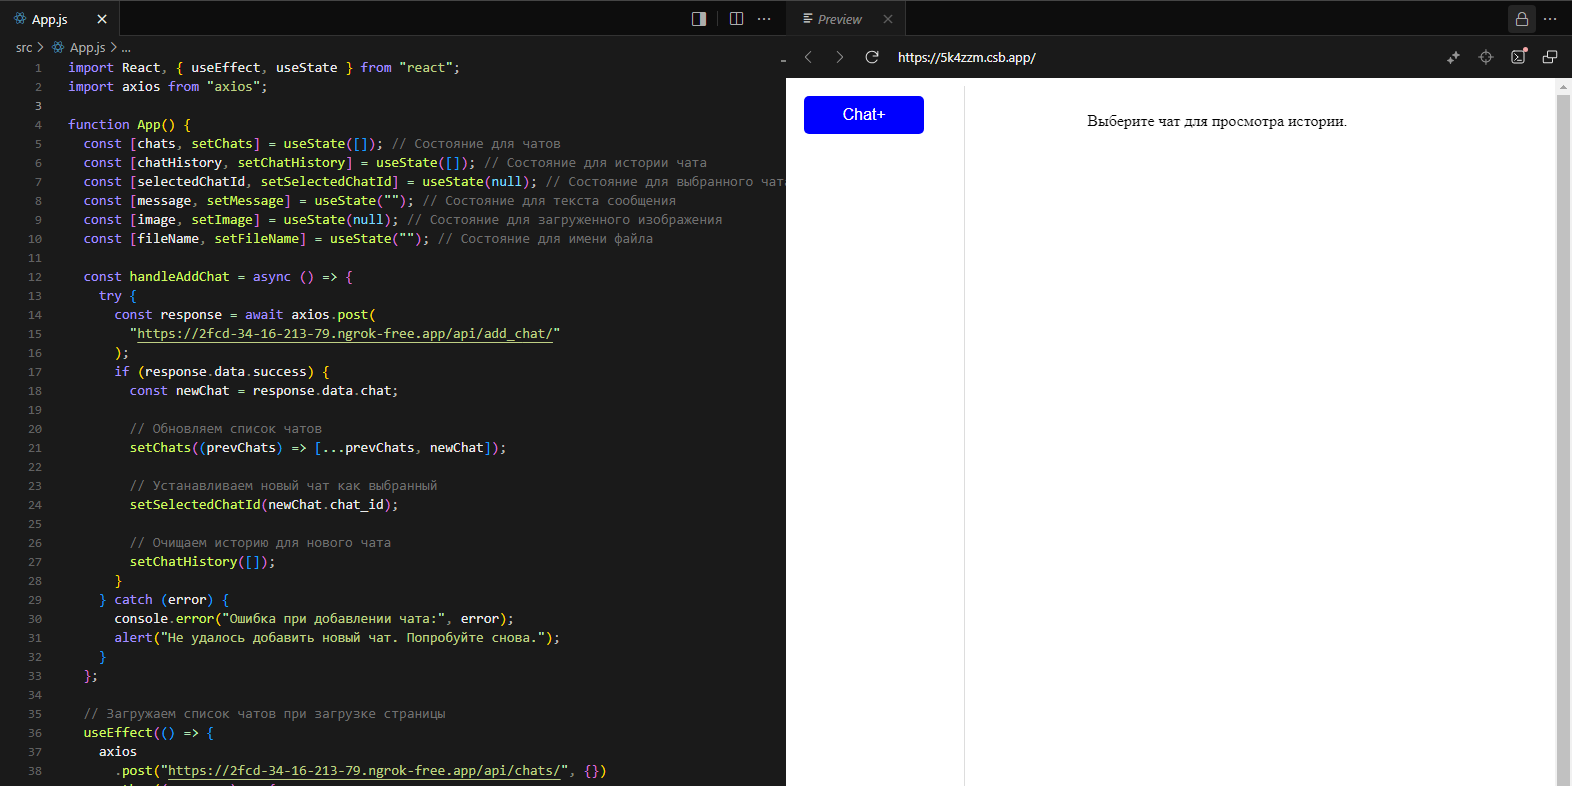

In [ ]:
# @title Установка Ngrok
!pip install pyngrok
from pyngrok import ngrok
#Авторизация
from google.colab import userdata
ngrok_key = userdata.get("NGROK_KEY")
ngrok.set_auth_token(ngrok_key)

## Запуск Django и React

In [ ]:
# Запуск Django в фоновом режиме
run_django()

/content/myproject


Ссылка (тунель) для 8000 порта для Django
> Ссылка понадобится для обработчика React

In [ ]:
public_url = ngrok.connect(8000)
print(f"django-приложение доступно по адресу: {public_url}")

django-приложение доступно по адресу: NgrokTunnel: "https://63bc-34-138-210-109.ngrok-free.app" -> "http://localhost:8000"


In [ ]:
# @title Перезапись обработчика React - добавление ссылки на сервис Django


public_url_str = str(public_url)

# Извлечение URL с использованием регулярного выражения
match = re.search(r'https://[^\s"]+', public_url_str)
if match:
    link_r = match.group(0)
    #print(f"django-приложение доступно по адресу: ")
    #print(link_r)
else:
    print("URL не найден.")

%cd /content/myproject/frontend

text_ob_react =  f"""

import React, {{ useEffect, useState }} from 'react';
import axios from 'axios';

function App() {{
    const [chats, setChats] = useState([]); // Состояние для чатов
    const [chatHistory, setChatHistory] = useState([]); // Состояние для истории чата
    const [selectedChatId, setSelectedChatId] = useState(null); // Состояние для выбранного чата
    const [message, setMessage] = useState(''); // Состояние для текста сообщения
    const [image, setImage] = useState(null); // Состояние для загруженного изображения
    const [fileName, setFileName] = useState(''); // Состояние для имени файла




const handleAddChat = async () => {{
    try {{
        const response = await axios.post('{link_r}/api/add_chat/');
        if (response.data.success) {{
            const newChat = response.data.chat;

            // Обновляем список чатов
            setChats((prevChats) => [...prevChats, newChat]);

            // Устанавливаем новый чат как выбранный
            setSelectedChatId(newChat.chat_id);

            // Очищаем историю для нового чата
            setChatHistory([]);


        }}
    }} catch (error) {{
        console.error('Ошибка при добавлении чата:', error);
        alert('Не удалось добавить новый чат. Попробуйте снова.');
    }}
}};


    // Загружаем список чатов при загрузке страницы
    useEffect(() => {{
        axios.post('{link_r}/api/chats/', {{}})
            .then(response => {{
                setChats(response.data); // Сохраняем чаты в состояние
            }})
            .catch(error => {{
                console.error('Ошибка при загрузке данных:', error);
            }});
    }}, []);

    // Обработчик для отправки POST-запроса при нажатии на кнопку
// Обработчик для загрузки истории чата
const handleButtonClick = (chatId) => {{
    axios.post('{link_r}/api/history/', {{
        id_chata: chatId, // Отправляем ID чата
    }})
        .then(response => {{
            console.log('Ответ от сервера:', response.data);
            const formattedHistory = response.data.map(entry => ({{
                vopros: entry.vopros,
                otvet: entry.otvet,
                image: entry.image || null, // Если изображения нет, записываем null
            }}));
            setChatHistory(formattedHistory); // Сохраняем историю в состояние
            setSelectedChatId(chatId); // Устанавливаем выбранный чат
        }})
        .catch(error =>{{
            console.error('Ошибка при загрузке истории чата:', error);
            alert('Не удалось загрузить историю чата. Попробуйте снова.');
        }});
}};

    // Обработчик изменения текста сообщения
    const handleMessageChange = (event) => {{
        setMessage(event.target.value); // Обновляем состояние текста сообщения
    }};



        // Обработчик загрузки изображения
    const handleImageChange = (event) => {{
        const file = event.target.files[0]; // Получаем загруженный файл
        if (file) {{
            setFileName(file.name); // Сохраняем имя файла
            const reader = new FileReader();
            reader.onloadend = () => {{
                setImage(reader.result); // Сохраняем изображение в состоянии как Base64
            }};
            reader.readAsDataURL(file); // Читаем файл как Data URL
        }} else {{
            setFileName(''); // Если файл не выбран, очищаем имя
            setImage(null); // Если файл не выбран, сбрасываем состояние
        }}
    }};




    // Обработчик отправки сообщения
    const handleSendMessage = async () => {{
    if (!selectedChatId) {{
        alert('Пожалуйста, выберите чат.');
        return;
    }}

    if (!message.trim() && !image) {{
        alert('Введите сообщение или загрузите изображение.');
        return;
    }}

    try {{
        if (image) {{
            // Отправка сообщения с изображением
            const base64Image = image.split(',')[1]; // Извлекаем только данные Base64
            const requestData = {{
                chat_id: selectedChatId,
                question: message.trim(),
                image_base64: base64Image,
            }};

            const response = await axios.post(
                '{link_r}/api/process_image/',
                requestData,
                {{
                    headers: {{
                        'Content-Type': 'application/json',
                    }},
                }}
            );

            const {{ gpt_reply }} = response.data;



            // Обновляем историю чата
            setChatHistory((prevHistory) => [
                ...prevHistory,
                {{ image, vopros: message.trim(), otvet: gpt_reply }},
            ]);

            setMessage(''); // Очищаем поле ввода
            setImage(null); // Сбрасываем изображение
            setFileName(''); // Очищаем имя файла


        }} else {{
            // Отправка сообщения без изображения
            const response = await axios.post(
                '{link_r}/api/process/',
                {{
                    chat_id: selectedChatId,
                    question: message.trim(),
                }},
                {{
                    headers: {{
                        'Content-Type': 'application/json',
                    }},
                }}
            );

            const {{ gpt_reply }} = response.data;

            if (gpt_reply.startsWith("data:image")) {{
                // Если ответ - изображение
                setChatHistory((prevHistory) => [
                    ...prevHistory,
                    {{ vopros: message.trim(), otvet: null, image: gpt_reply }},
                ]);
            }} else {{
                // Если ответ - текст
                setChatHistory((prevHistory) => [
                    ...prevHistory,
                    {{ vopros: message.trim(), otvet: gpt_reply }},
                ]);
            }}


            setMessage(''); // Очищаем поле ввода
        }}
    }} catch (error) {{
        console.error('Ошибка при отправке сообщения с изображением:', error);
        alert('Не удалось отправить сообщение с изображением. Попробуйте снова.');
    }}
}};


    return (
        <div style={{{{ display: 'flex', height: '100vh' }}}}>
            {{/* Левая часть экрана с кнопками чатов */}}
            <div style={{{{
                width: '150px', padding: '10px', borderRight: '1px solid #ddd', display: 'flex', flexDirection: 'column'
            }}}}>



          <div style={{{{ marginBottom: '20px' }}}}>
              <button
                  onClick={{handleAddChat}}
                  style={{{{
                      padding: '10px 20px',
                      fontSize: '16px',
                      color: 'white',
                      width: '120px',
                      backgroundColor: 'blue',
                      border: 'none',
                      borderRadius: '5px',
                      cursor: 'pointer',
                  }}}}
              >
                  Chat+
              </button>
          </div>


                <div>
                    {{chats.map(chat => (
                        <button
                            key={{chat.chat_id}}
                            onClick={{() => handleButtonClick(chat.chat_id)}} // Нажатие вызывает обработчик
                            style={{{{
                                margin: '10px 0',
                                padding: '10px 20px',
                                fontSize: '16px',
                                color: 'white',
                                width: '120px',
                                backgroundColor: 'green',
                                border: 'none',
                                borderRadius: '5px',
                                cursor: 'pointer',
                            }}}}
                        >
                            {{chat.chat_name}}
                        </button>
                    ))}}
                </div>
            </div>

            {{/* Правая часть экрана с историей чатов и блоком для отправки сообщения */}}
            <div style={{{{
                flexGrow: 1, padding: '10px', display: 'flex', flexDirection: 'column', height: '95%', width: '60%', alignItems: 'center'
            }}}}>
                {{/* История чатов */}}



 <div style={{{{ flexGrow: 1, overflowY: 'auto', width: '60%' }}}}>

    {{selectedChatId ? (
        <div>


            <div style={{{{ fontFamily: 'Arial, sans-serif', fontSize: '14px', marginBottom: '10px', lineHeight: '1.5', color: '#333' }}}}>
            <ul style={{{{ listStyle: 'none', paddingLeft: '0' }}}}>
                {{chatHistory.length > 0 ? (
                    chatHistory.map((entry, index) => (
            <li key={{index}} style={{{{ marginBottom: '10px' }}}}>
                <strong>Вопрос:</strong> {{entry.vopros}}<br />
                <strong>Ответ: </strong>
               {{entry.otvet && <span>{{entry.otvet}}</span>}}
                {{entry.image ? (
                    <div style={{{{ marginTop: '10px' }}}}>

                        <img
                            src={{entry.image}}
                            alt="Изображение из чата"
                            style={{{{ width: '100%', maxWidth: '400px', border: '1px solid #ccc' }}}}
                        />
                    </div>
                ) : null}}
            </li>



                    ))
                ) : (
                    <p>История не найдена</p>
                )}}
            </ul>
            </div>
        </div>
    ) : (
        <p>Выберите чат для просмотра истории.</p>
    )}}
</div>



                {{/* Блок для ввода сообщения и кнопка отправки */}}
                {{selectedChatId && (
                    <div
                        style={{{{
                             marginTop: '10px',
                padding: '10px',
                backgroundColor: '#fff',

                width: '100%',
                maxWidth: '600px',
                display: 'flex',
                flexDirection: 'column',
                alignItems: 'center',
                        }}}}
                    >

                        <textarea
                            value={{message}}
                            onChange={{handleMessageChange}}
                            placeholder="Введите вопрос..."
                            rows="4"
                            style={{{{
                                width: '100%',
                    padding: '10px',
                    fontSize: '16px',
                    borderRadius: '10px',
                    border: '1px solid #ccc',
                    resize: 'none',
                    marginBottom: '10px',
                            }}}}
                        />

        {{/* Блок с кнопкой загрузки и кнопкой отправки */}}
        <div
            style={{{{
                display: 'flex',
                justifyContent: 'space-between',
                width: '100%',
                marginTop: '10px',
            }}}}
        >


                        {{/* Кнопка для загрузки изображения */}}
<div style={{{{ display: 'flex', alignItems: 'center' }}}}>
    <label htmlFor="file-upload" style={{{{ cursor: 'pointer', padding: '10px', backgroundColor: '#4CAF50', color: 'white', borderRadius: '5px' }}}}>
        Выберите файл
    </label>
    <input
        id="file-upload"
        type="file"
        accept="image/*"
        onChange={{handleImageChange}}
        style={{{{
            display: 'none', // Скрываем стандартный input
        }}}}
    />
    {{fileName && <span style={{{{ marginLeft: '10px' }}}}>{{fileName}}</span>}} {{/* Отображаем имя файла */}}
</div>




                        <button
                            onClick={{handleSendMessage}}
                            style={{{{
                               padding: '10px 20px',
            fontSize: '16px',
            color: 'white',
            backgroundColor: 'green',
            border: 'none',
            borderRadius: '5px',
            cursor: 'pointer',
                            }}}}
                        >
                            Отправить
                        </button>
                    </div>
                    </div>
                )}}
            </div>
        </div>
    );
}};

export default App;


"""

# Создадим API для обработки текста
with open('src/App.js', 'w') as file:
    file.write(text_ob_react)

/content/myproject/frontend


Запуск React в фоновом режиме

In [ ]:
run_react()

Cсылка (тунель) для 3000 порта для React

In [ ]:
public_url2 = ngrok.connect(3000)
print(f"React-приложение доступно по адресу: {public_url2}")

React-приложение доступно по адресу: NgrokTunnel: "https://fabb-34-138-210-109.ngrok-free.app" -> "http://localhost:3000"


## Просмотр таблиц Chat и History из базы данных

In [ ]:
bd_read()

Chat DataFrame:
 id  chat_id chat_name
  1        1     Чат 1
  2        2     Чат 2
  3        3     Чат 3
  4        4     Чат 4

History DataFrame:
 id  chat_id                                        chat_vopros                                         chat_otvet chat_image
  1        1                              что здесь изображено? На изображении запечатлена улица с архитектурными  /9j/4AAQSk
  2        2 Расскажи про перспективы использования ИИ в машино С удовольствием расскажу! Искусственный интеллект        None
  3        2 Создай иллюстрацию к статье про перспективы исполь                                                    iVBORw0KGg
  4        3 Какие ошибки ты считаешь наиболее критичными для с Привет! Это отличный вопрос, и я рад помочь. Вот н       None
  5        3                  Расскажи, что изображено на фото? На фото изображён panoramic views of a cityscape,  /9j/4AAQSk
  6        3         Что значит panoramic views of a cityscape? Привет! "Panoramic views of a